# Import Library

In [440]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [441]:
customer = pd.read_csv('customer_segmentation_data.csv')

# EDA Data

In [442]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [443]:
print(customer.describe())

       minutes_watched          CLV       region      channel
count      3725.000000  3834.000000  3834.000000  3834.000000
mean       1972.094497   118.383920     1.167188     3.870370
std        7401.693028    70.471274     0.923055     2.191972
min           0.000000     0.000000     0.000000     1.000000
25%         159.000000    62.580000     0.000000     2.000000
50%         512.000000   119.000000     2.000000     3.000000
75%        1521.000000   149.990000     2.000000     6.000000
max      288508.000000   626.400000     2.000000     8.000000


In [444]:
customer.isna().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [445]:
customer['minutes_watched'] = customer['minutes_watched'].fillna(0)
#fill missing value with 0 mean that customer never watch 

In [446]:
customer['Region'] = pd.Categorical(customer['region'].replace({0: 'USA, Canada, United Kingdom, Australia', 1: 'Western Europe', 2: 'Rest of the World'}))
customer['Channel'] = pd.Categorical(customer['channel'].replace({1: 'Google', 2: 'Facebook', 3: 'YouTube' , 4: 'Linkedin' , 5: 'Twitter' , 6:'Instagram' , 7:'Friend' , 8:'Other'}))
#change category for visualization

In [447]:
customer

,minutes_watched,CLV,region,channel,Region,Channel
0,3197.0,205.42,2,4,Rest of the World,Linkedin
1,63.0,149.99,0,1,"USA, Canada, United Kingdom, Australia",Google
2,605.0,119.00,2,2,Rest of the World,Facebook
3,20.0,240.00,2,4,Rest of the World,Linkedin
4,245.0,184.36,1,4,Western Europe,Linkedin
...,...,...,...,...,...,...
3829,11.0,79.00,0,3,"USA, Canada, United Kingdom, Australia",YouTube
3830,28.0,79.00,0,2,"USA, Canada, United Kingdom, Australia",Facebook
3831,57.0,36.00,2,2,Rest of the World,Facebook
3832,44.0,36.00,2,1,Rest of the World,Google


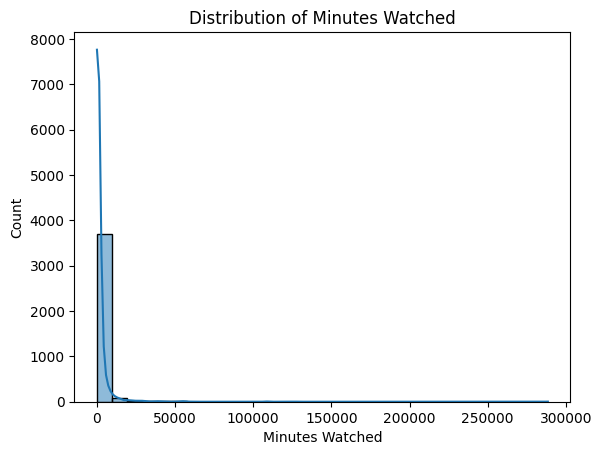

In [448]:
#Histogram plot for min watch
sns.histplot(customer['minutes_watched'], bins=30, kde=True)
plt.title('Distribution of Minutes Watched')
plt.xlabel('Minutes Watched')
plt.ylabel('Count')
plt.show()
#Most of people have min watch around 0-15000 min

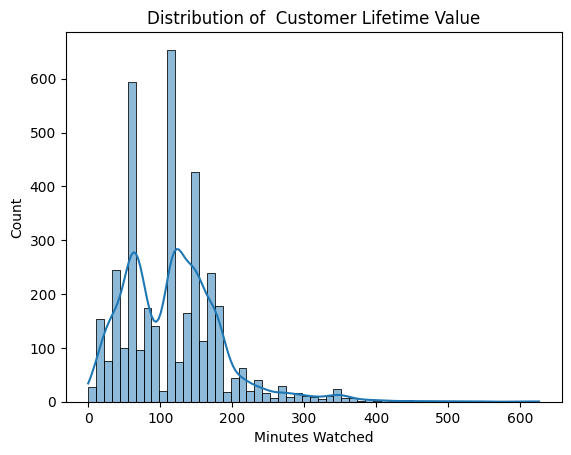

In [449]:
#histogram plot for CLV (Customer Lifetime Value)
sns.histplot(customer['CLV'], kde=True)
plt.title('Distribution of  Customer Lifetime Value')
plt.xlabel('Minutes Watched')
plt.ylabel('Count')
plt.show()

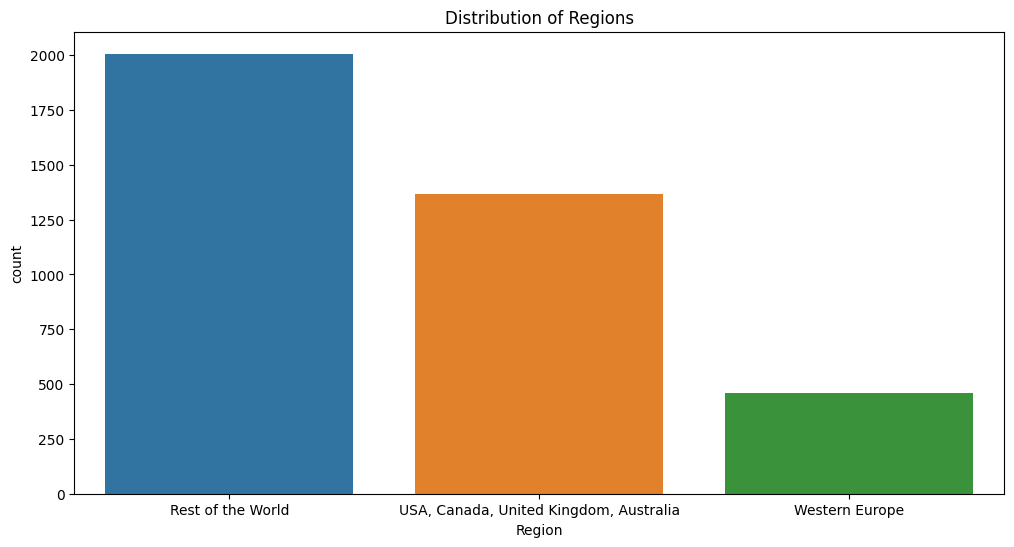

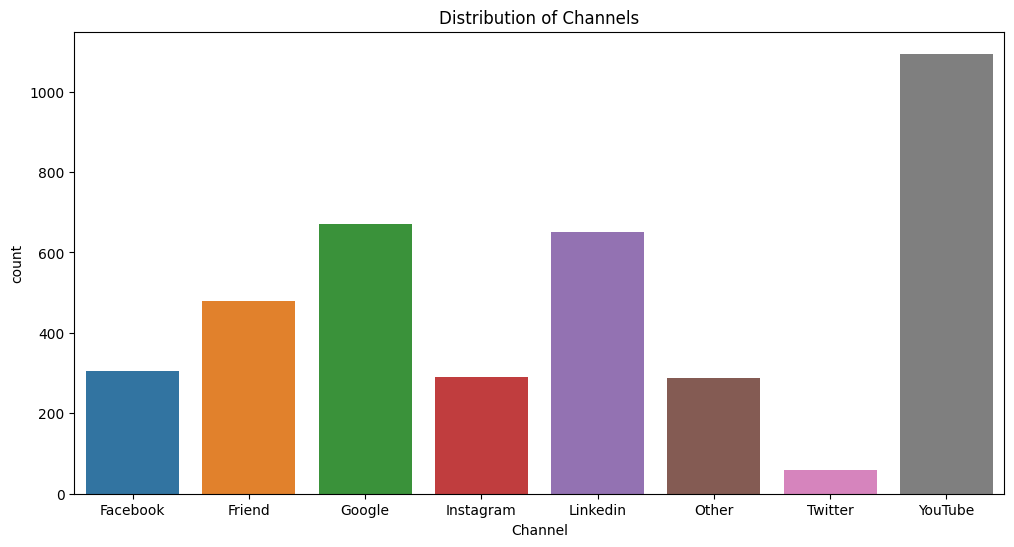

In [450]:
#distribution by region
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=customer)
plt.title('Distribution of Regions')
plt.show()

#distrubution by channel
plt.figure(figsize=(12, 6))
sns.countplot(x='Channel', data=customer)
plt.title('Distribution of Channels')
plt.show()

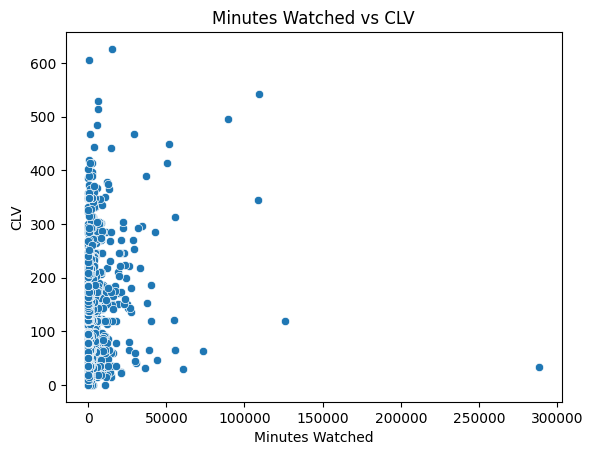

In [451]:
#scatter plot for min watch & CLV
sns.scatterplot(x='minutes_watched', y='CLV', data=customer)
plt.title('Minutes Watched vs CLV')
plt.xlabel('Minutes Watched')
plt.ylabel('CLV')
plt.show()
#no coorletion 

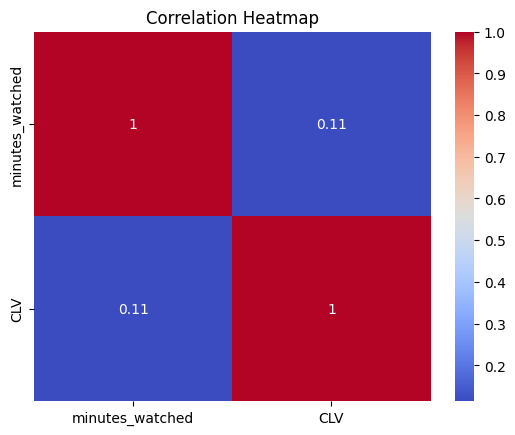

In [452]:
sns.heatmap(customer[['minutes_watched', 'CLV']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
#corr by CLV and min watch is 0.11 it weaks

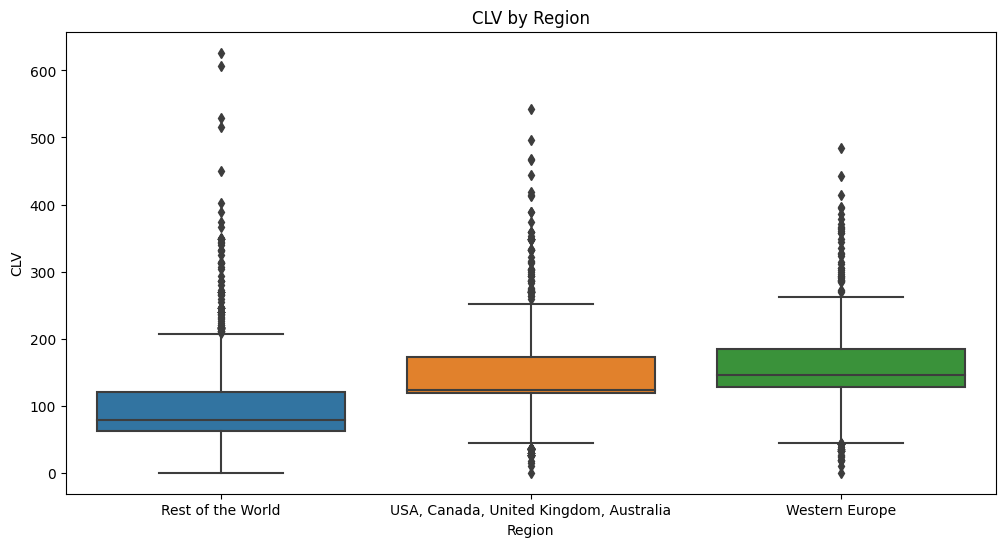

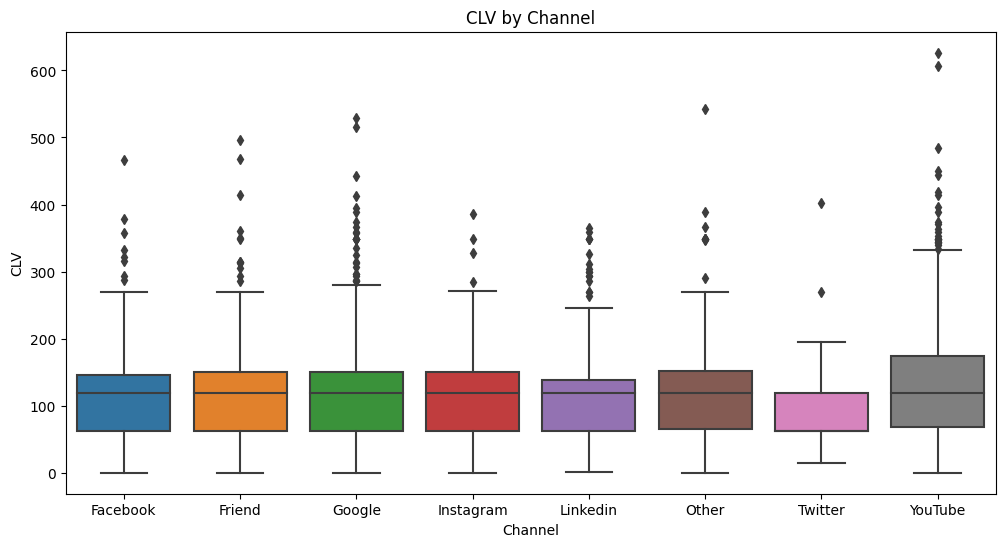

In [453]:
#box plot by region with CLV
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='CLV', data=customer)
plt.title('CLV by Region')
plt.show()

#box plot by channel
plt.figure(figsize=(12, 6))
sns.boxplot(x='Channel', y='CLV', data=customer)
plt.title('CLV by Channel')
plt.show()


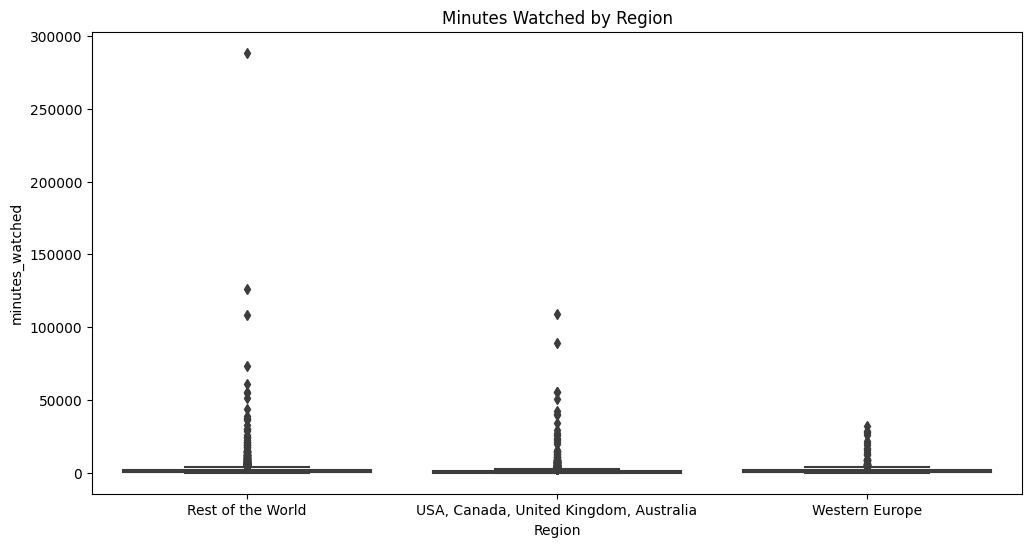

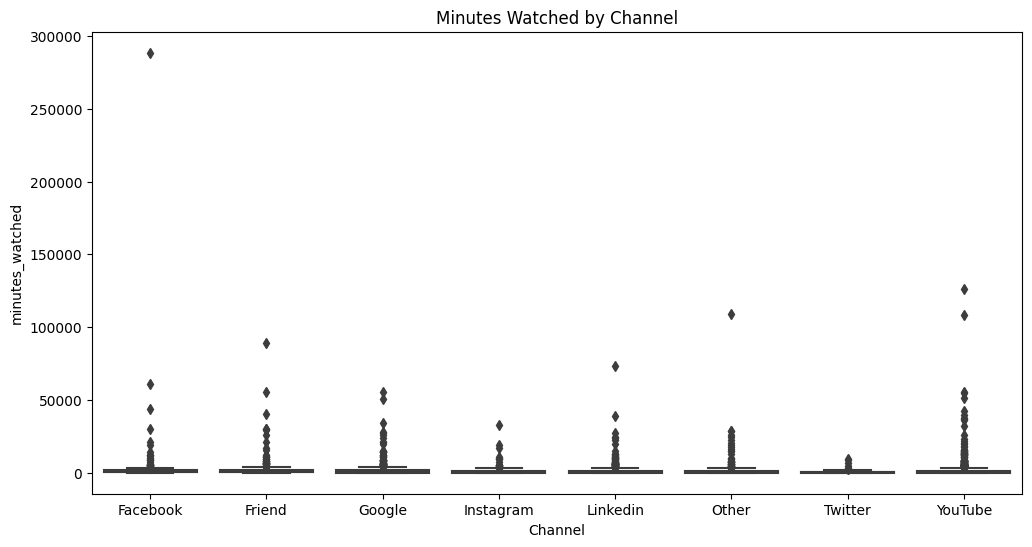

In [454]:
#box plot by region with min watch
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='Region', y='minutes_watched', data=customer)
plt.title('Minutes Watched by Region')
plt.show()

#box plot by region with min watch
plt.figure(figsize=(12, 6))
sns.boxplot(x='Channel', y='minutes_watched', data=customer)
plt.title('Minutes Watched by Channel')
plt.show()

In [455]:
customer = customer.drop(['Region' , 'Channel'] , axis = 1)


In [456]:
#one hot encoding
customer['Region'] = pd.Categorical(customer['region'].replace({0: 'USA, Canada, United Kingdom, Australia', 1: 'Western Europe', 2: 'Rest of the World'}))
customer['Channel'] = pd.Categorical(customer['channel'].replace({1: 'Google', 2: 'Facebook', 3: 'YouTube' , 4: 'YouTube' , 5: 'Twitter' , 6:'Instagram' , 7:'Friend' , 8:'Other'}))

df_dummies1 = pd.get_dummies(customer['Region'] , prefix_sep='_').astype(int)
df_dummies2 = pd.get_dummies(customer['Channel'] , prefix_sep='_').astype(int)
customer = pd.concat([customer, df_dummies1], axis=1)
customer = pd.concat([customer, df_dummies2], axis=1)
customer = customer.drop(['Region','Channel','channel','region'] , axis = 1)

In [457]:
customer

,minutes_watched,CLV,Rest of the World,"USA, Canada, United Kingdom, Australia",Western Europe,Facebook,Friend,Google,Instagram,Other,Twitter,YouTube
0,3197.0,205.42,1,0,0,0,0,0,0,0,0,1
1,63.0,149.99,0,1,0,0,0,1,0,0,0,0
2,605.0,119.00,1,0,0,1,0,0,0,0,0,0
3,20.0,240.00,1,0,0,0,0,0,0,0,0,1
4,245.0,184.36,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,0,1,0,0,0,0,0,0,0,1
3830,28.0,79.00,0,1,0,1,0,0,0,0,0,0
3831,57.0,36.00,1,0,0,1,0,0,0,0,0,0
3832,44.0,36.00,1,0,0,0,0,1,0,0,0,0


# Model Implementation

In [458]:
#standardscaler 
scaler = StandardScaler()
customer_std = scaler.fit_transform(customer)
customer_std


array([[ 0.17542513,  1.23521866,  0.95410372, ..., -0.2849882 ,
        -0.12393615,  1.09471206],
       [-0.25376647,  0.44855443, -1.04810408, ..., -0.2849882 ,
        -0.12393615, -0.91348222],
       [-0.17954125,  0.00874342,  0.95410372, ..., -0.2849882 ,
        -0.12393615, -0.91348222],
       ...,
       [-0.25458815, -1.16919507,  0.95410372, ..., -0.2849882 ,
        -0.12393615, -0.91348222],
       [-0.25636846, -1.16919507,  0.95410372, ..., -0.2849882 ,
        -0.12393615, -0.91348222],
       [-0.26239413, -0.55893778, -1.04810408, ..., -0.2849882 ,
        -0.12393615,  1.09471206]])

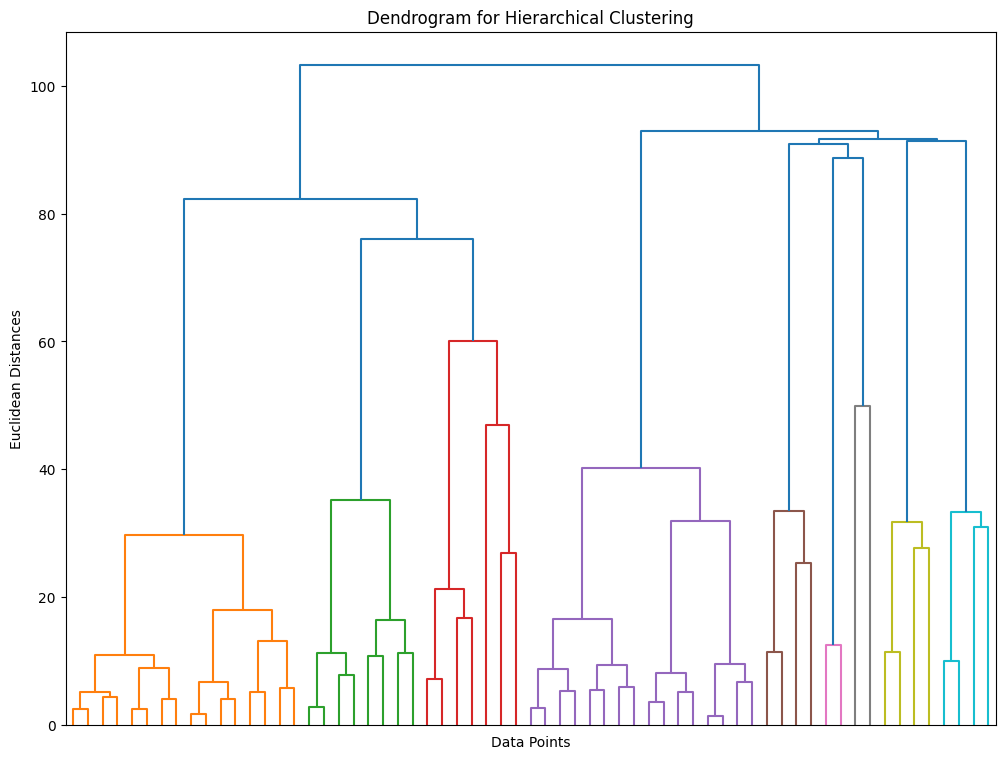

In [459]:
# Plot the dendrogram
hier_clust  = linkage(customer_std, method='ward')

# Plot the dendrogram to identify the optimal number of clusters
plt.figure(figsize=(12, 9))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

In [460]:
#saw 9 cluster

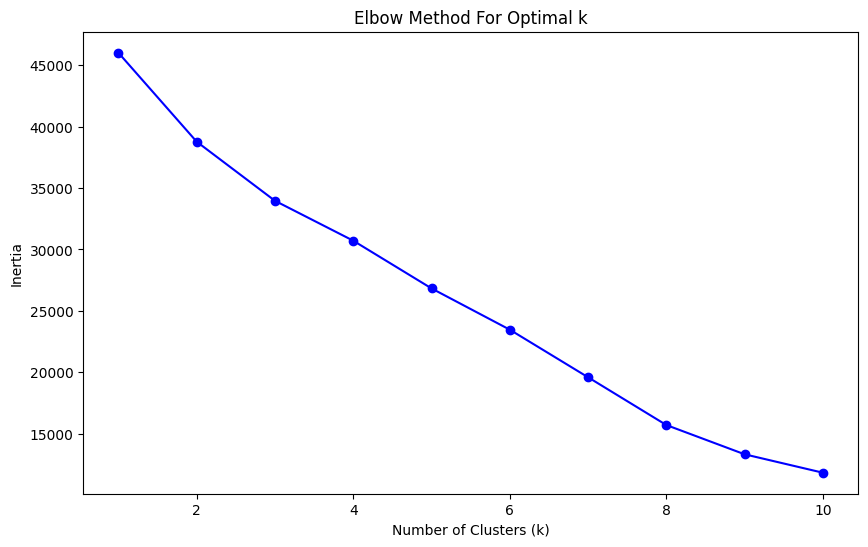

In [461]:
from sklearn.cluster import KMeans

# Calculate the sum of squared distances (inertia) for each value of k
inertia = []
K = range(1, 11)  
for k in K:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42 , n_init=10)
    kmeans.fit(customer_std)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [462]:
#elbow method is 9
k = 9  #Select cluster
kmeans = KMeans(n_clusters=k, random_state=42 , n_init= 'auto')
customer['Group'] = kmeans.fit_predict(customer_std)

# Result

In [463]:
df_analysis = customer.groupby(['Group']).mean() #group 
df_analysis['count'] = customer.groupby(['Group']).size() #count customer for each group
df_analysis['% people'] = df_analysis['count'] / df_analysis['count'].sum() *100 #calculate % 
df_analysis.round(2)

,minutes_watched,CLV,Rest of the World,"USA, Canada, United Kingdom, Australia",Western Europe,Facebook,Friend,Google,Instagram,Other,Twitter,YouTube,count,% people
Group,,,,,,,,,,,,,,
0,1299.33,115.18,0.50,0.31,0.19,0.0,0.00,0.00,1.0,0.0,0.0,0.00,289,7.54
1,1305.61,136.78,0.00,1.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.00,645,16.82
2,2018.97,109.12,0.71,0.29,0.00,0.0,1.00,0.00,0.0,0.0,0.0,0.00,424,11.06
3,1830.43,115.21,0.56,0.44,0.00,0.0,0.00,1.00,0.0,0.0,0.0,0.00,590,15.39
4,2241.83,100.27,1.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.00,902,23.53
5,2767.64,108.26,0.61,0.29,0.10,1.0,0.00,0.00,0.0,0.0,0.0,0.00,306,7.98
6,1806.61,161.69,0.00,0.00,1.00,0.0,0.16,0.24,0.0,0.0,0.0,0.59,332,8.66
7,985.33,93.15,0.78,0.17,0.05,0.0,0.00,0.00,0.0,0.0,1.0,0.00,58,1.51
8,2314.08,123.19,0.35,0.51,0.14,0.0,0.00,0.00,0.0,1.0,0.0,0.00,288,7.51


In [464]:
df_analysis.rename({0:'Instragram Group',
                         1:'Anglosphere Youtube Group',
                         2:"Friends' Influence Group",
                         3:'Google Group',
                         4:'Youtube Group', 
                         5:'Facebook Group',
                         6:'West Eu Group',
                         7:'Twitter Group', 
                         8:'Others Group'
                        },inplace = True)
df_analysis.round(2)

,minutes_watched,CLV,Rest of the World,"USA, Canada, United Kingdom, Australia",Western Europe,Facebook,Friend,Google,Instagram,Other,Twitter,YouTube,count,% people
Group,,,,,,,,,,,,,,
Instragram Group,1299.33,115.18,0.50,0.31,0.19,0.0,0.00,0.00,1.0,0.0,0.0,0.00,289,7.54
Anglosphere Youtube Group,1305.61,136.78,0.00,1.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.00,645,16.82
Friends' Influence Group,2018.97,109.12,0.71,0.29,0.00,0.0,1.00,0.00,0.0,0.0,0.0,0.00,424,11.06
Google Group,1830.43,115.21,0.56,0.44,0.00,0.0,0.00,1.00,0.0,0.0,0.0,0.00,590,15.39
Youtube Group,2241.83,100.27,1.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.00,902,23.53
Facebook Group,2767.64,108.26,0.61,0.29,0.10,1.0,0.00,0.00,0.0,0.0,0.0,0.00,306,7.98
West Eu Group,1806.61,161.69,0.00,0.00,1.00,0.0,0.16,0.24,0.0,0.0,0.0,0.59,332,8.66
Twitter Group,985.33,93.15,0.78,0.17,0.05,0.0,0.00,0.00,0.0,0.0,1.0,0.00,58,1.51
Others Group,2314.08,123.19,0.35,0.51,0.14,0.0,0.00,0.00,0.0,1.0,0.0,0.00,288,7.51


In [465]:
#We devided customer into 9 Group
#Group 1 Instragram User - Have customer from all region half of them from rest in the world. All of them discover from Instragram. Have medium engagement and spending
#Group 2 Anglosphere Youtube - All of them from USA,CANADA,UK,AUS and discover from youtube . Have medium engagement but 2nd in spending
#Group 3 Friends' Influence - This group discover platform from friend. Have high engagement but low spending
#Group 4 Google User - This group found this platform form Google. Have high engagement and mid spending
#Group 5 Youtube User - This customer from rest of the world found this platform from Youtube and it largest group. Have high engagement but low spending
#Group 6 Facebook User - This group found from face book. Have most engagement but low spending
#Group 7 West EU Group - This group have highest spending  and came from West Eu
#Group 8 Twitter Group - This is smallest group that came from Twitter have lowest engagement and spending
#Group 9 Other Group - This group select other. having high engagement and spending


In [466]:
customer['Labels'] = customer['Group'].map({0:'Instragram Group',
                         1:'Anglosphere Youtube Group',
                         2:'Friend Influence Group',
                         3:'Google Group',
                         4:'Youtube Group', 
                         5:'Facebook Group',
                         6:'Western Eu Group',
                         7:'Twitter Group', 
                         8:'Others Group'
                        })


Plot Customer with Kmeans group

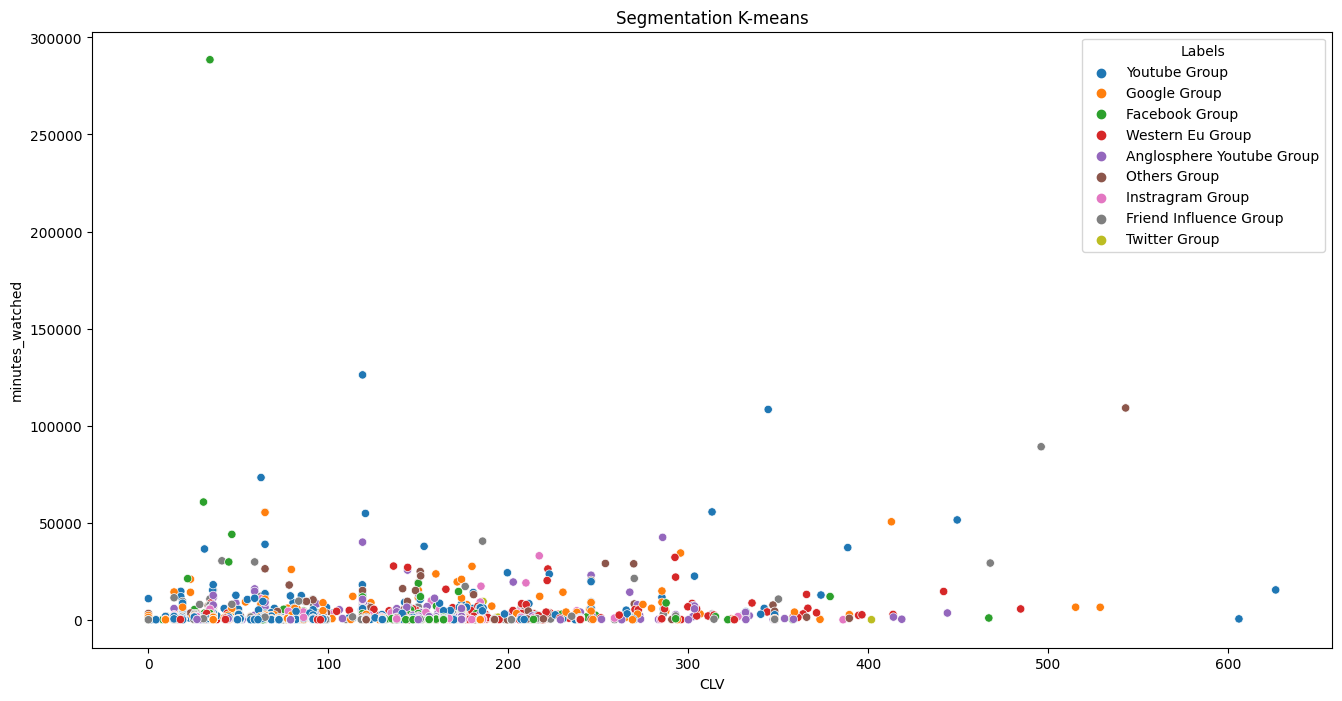

In [467]:
x_axis = customer['CLV']
y_axis = customer['minutes_watched']


plt.figure(figsize = (16, 8))

sns.scatterplot(x = x_axis, y = y_axis, hue = customer['Labels'])

plt.title('Segmentation K-means')

plt.show()